## Twitter sentiment analyser example

In [1]:
import re

import numpy as np
import pandas as pd

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline

from textblob import TextBlob

from pymongo import MongoClient

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='white')

from wordcloud import WordCloud

# https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
# https://towardsdatascience.com/multinomial-naive-bayes-classifier-for-text-analysis-python-8dd6825ece67
# https://marcobonzanini.com/2015/05/17/mining-twitter-data-with-python-part-6-sentiment-analysis-basics/
# https://medium.freecodecamp.org/basic-data-analysis-on-twitter-with-python-251c2a85062e

### 1. Utility classes

In [2]:
class TextPreprocesser(object):
    def __init__(self):
        pass

    def clean_text(self, text):
        ''' Utility function to clean text by removing links, special
        characters using simple regex statements.
        '''
        return ' '.join(
            re.sub(
                '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', text
            ).split()
        )


class SentimentAnalyser(TextPreprocesser):
    def __init__(self):
        pass

    def get_sentiment(self, text):
        ''' Utility function to classify sentiment of passed text using
        textblob's sentiment method
        '''
        # Create TextBlob object of passed text
        analysis = TextBlob(self.clean_text(text))

        # Set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

### 2. Getting the data

Data has already been downloaded using the Twitter API and the CustomListener class defined in listener.py script. The keyword was Brexit and the first idea was to analyse the sentiment of tweets coming from the UK versus tweets coming from the rest of the EU.

In [3]:
client = MongoClient('localhost', port=27017)
db = client['tweets']
collection = db['uk_brexit']

res = collection.find({}, {'_id': False})
res = list(res[:])[:200]

## 3. Sentiment analysis

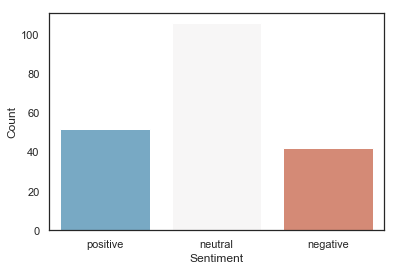

In [4]:
analyser = SentimentAnalyser()

clean_tweets = [analyser.clean_text(tweet['text']) for tweet in res]
sentiments = [analyser.get_sentiment(tweet) for tweet in clean_tweets]
sentiments_counter = Counter(sentiments)

# Sort keys for the barplot palette
key_order = ['positive', 'neutral', 'negative']
sentiments_counter = {k : sentiments_counter[k] for k in key_order}

# Sentiment plot
sentiments_df = pd.DataFrame({
    'Sentiment': list(sentiments_counter.keys()),
    'Count': list(sentiments_counter.values()),
})
ax = sns.barplot(
    x='Sentiment', y='Count', data=sentiments_df, palette='RdBu_r'
)
plt.show()

## 4. Wordcloud

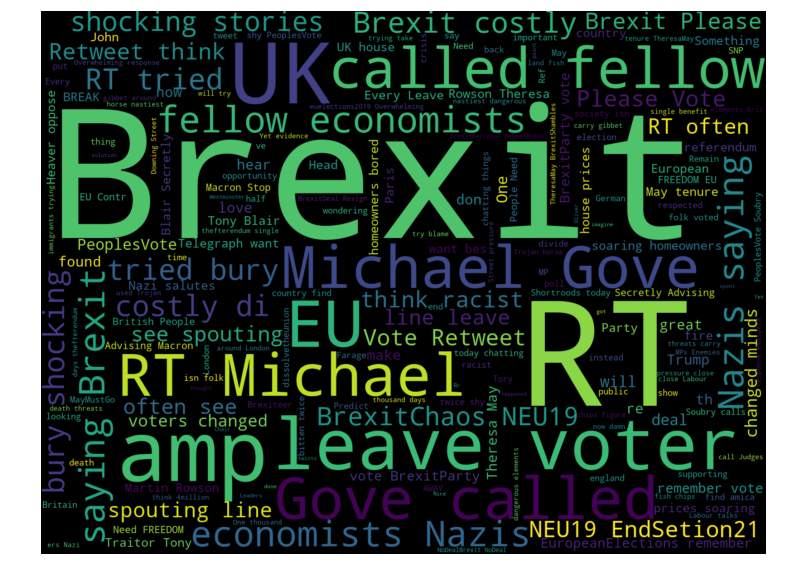

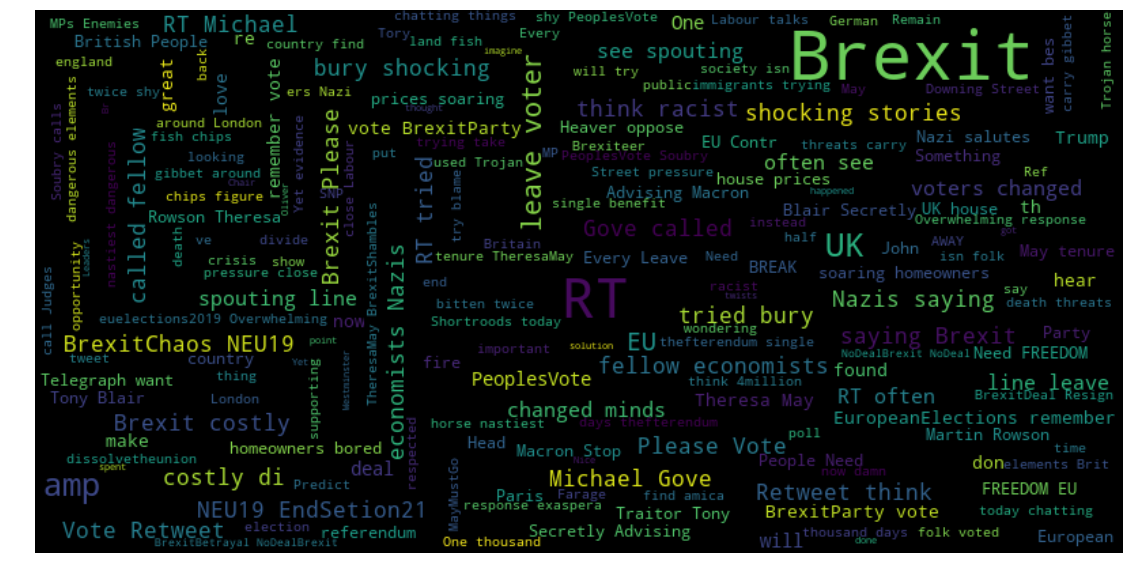

In [5]:
def plot_wordcloud(text):

    # Generate a word cloud image
    wordcloud = WordCloud(
        width=1600, height=1200
    ).generate(' '.join(text))
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # lower max_font_size
    wordcloud = WordCloud(
        width=800, height=400, max_font_size=50
    ).generate(' '.join(text))
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # Show the plots
    plt.show()

plot_wordcloud(clean_tweets)